In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import os

# Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
fault_dir = "../../../data/shaw2021/rundir5091"
catalogue_dir = fault_dir

Read in fault model and catalogue.
The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462

In [2]:
fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
                                                     transform_from_utm=True)
whole_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
                                                                list_file_directory=catalogue_dir, list_file_prefix="catalog")

Event of interest (note that we have only selected faults that rupture with >50 patches in this event).

Note also that `events_by_number` returns a list, and we take the first element from it.

In [6]:
event = whole_catalogue.events_by_number(1700, fault_model, min_patches=1)[0]

Create and write animation

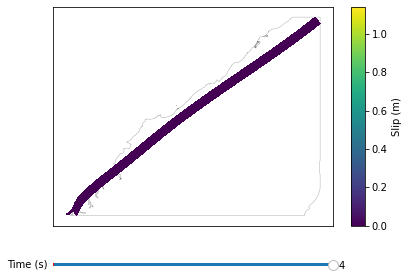

In [7]:
event.plot_slip_evolution(step_size = 2, write="slip_evolution", show=False)

Display GIF

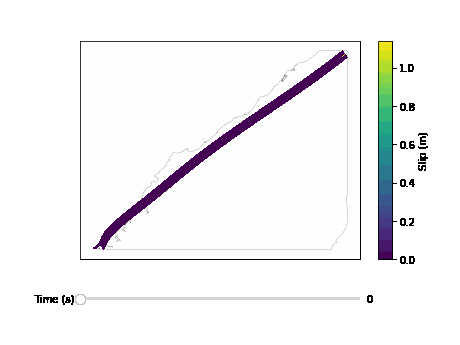

In [8]:
from IPython.display import Image
Image(open('slip_evolution.gif','rb').read())